In [1]:
from pogo import Pogo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import  datasets, metrics
from sklearn.preprocessing import MinMaxScaler
from urllib.request import urlopen
from urllib.parse import urlparse
import os.path

In [3]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

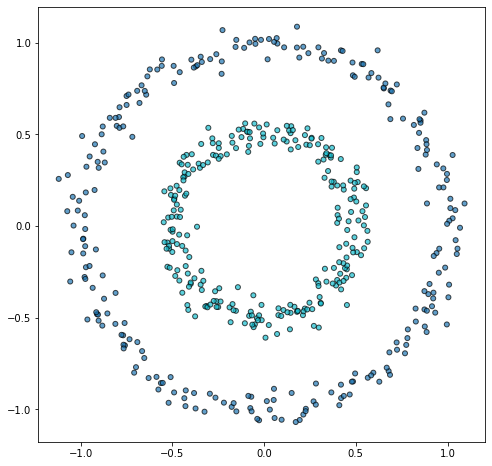

In [4]:
X=noisy_circles[0]
y=noisy_circles[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

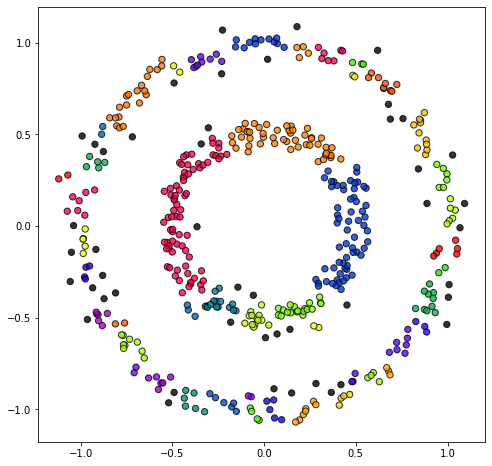

In [5]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [6]:
pogo.idx_

794

In [7]:
pogo.candidates_[:10]

array([2389, 1996, 1717, 2320,    2, 1933, 1824,    7,   68,  794])

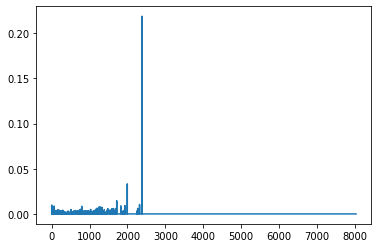

In [8]:
plt.plot(pogo.gap_vector_)

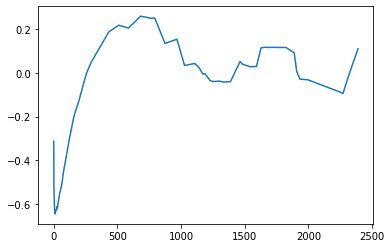

In [9]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


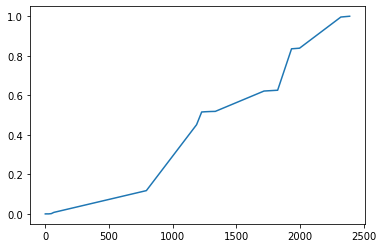

In [10]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [11]:
rand_indices[np.argmax(rand_array)]

2389

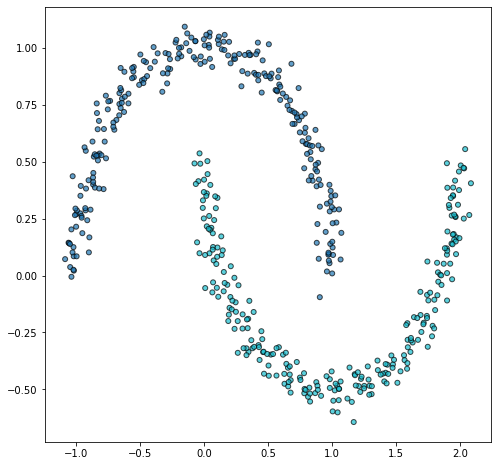

In [12]:
X=noisy_moons[0]
y=noisy_moons[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

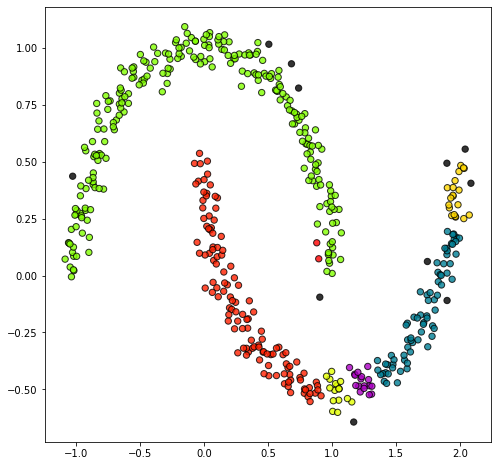

In [13]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [14]:
pogo.idx_

1510

In [15]:
pogo.candidates_[:10]

array([3659, 2621, 2107,    2, 1734, 1940, 1346, 2514,    1,   11])

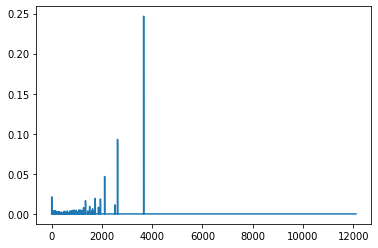

In [16]:
plt.plot(pogo.gap_vector_)

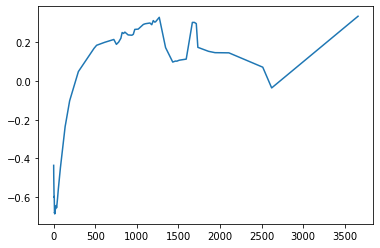

In [17]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)

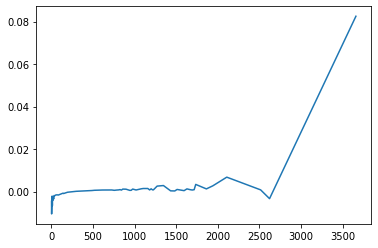

In [18]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [19]:
silhouette_indices[np.argmax(silhouette_gap)]

3659

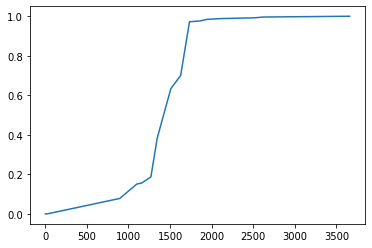

In [20]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [21]:
rand_indices[np.argmax(rand_array)]

3659

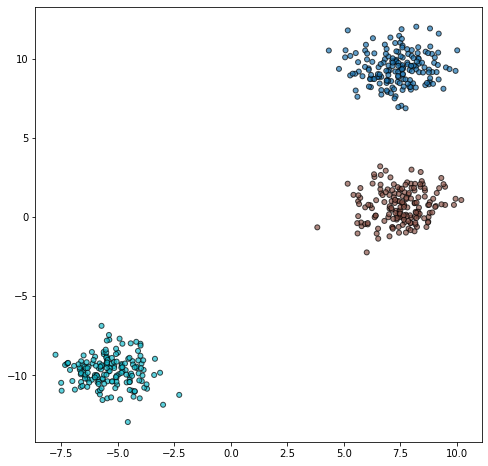

In [22]:
X=blobs[0]
y=blobs[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

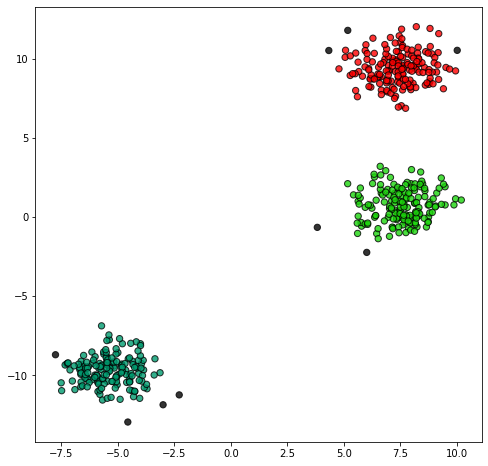

In [23]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [24]:
pogo.idx_

4257

In [25]:
pogo.candidates_[:10]

array([22008, 40162, 16771, 12286,  8881,  5322, 10585,  6624,  4257,
        7996])

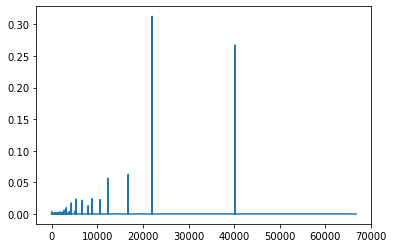

In [26]:
plt.plot(pogo.gap_vector_)

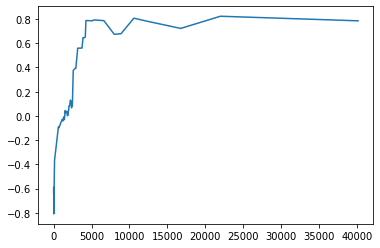

In [27]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)

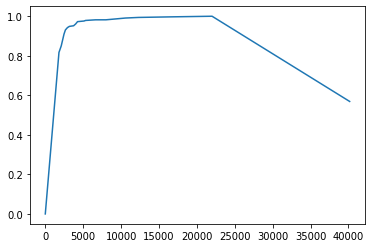

In [28]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [29]:
rand_indices[np.argmax(rand_array)]

22008

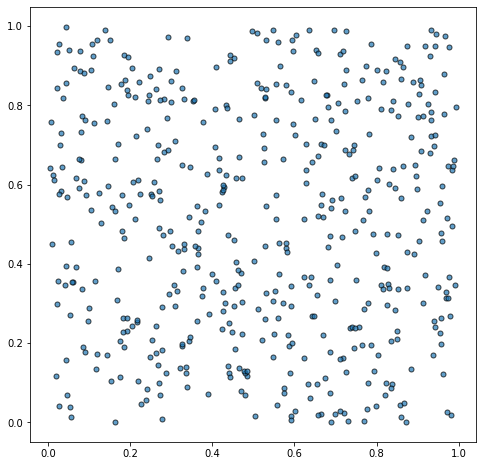

In [30]:
X=no_structure[0]
y=no_structure[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

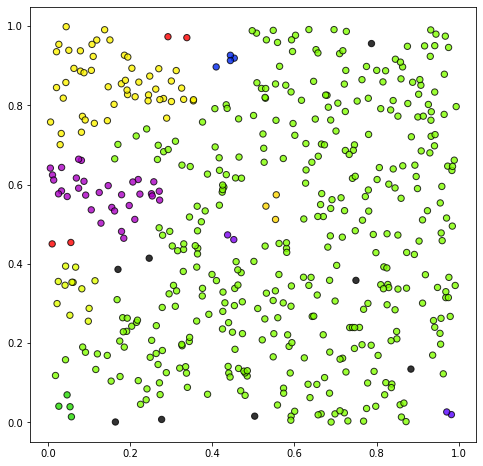

In [31]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [32]:
pogo.idx_

1114

In [33]:
pogo.candidates_[:10]

array([   6, 1636,    1,    8,    3,   33,   96,   16,   11,   25])

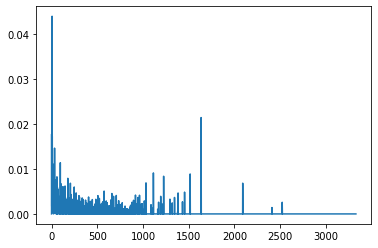

In [34]:
plt.plot(pogo.gap_vector_)

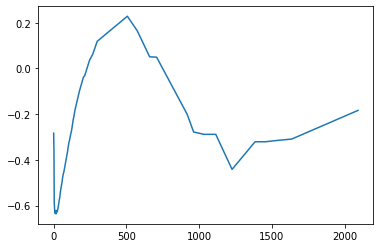

In [35]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


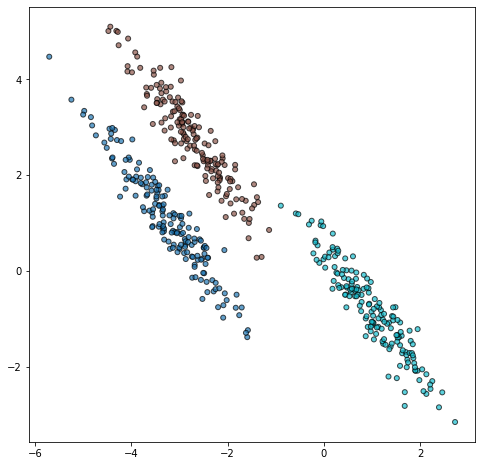

In [36]:
X=aniso[0]
y=aniso[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

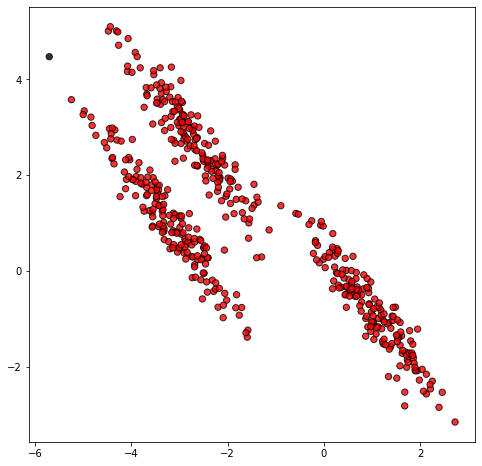

In [37]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [38]:
pogo.idx_

8321

In [39]:
pogo.candidates_[:10]

array([8321, 4803, 7101, 3035, 1590, 6584, 4003, 2643, 4498, 3436])

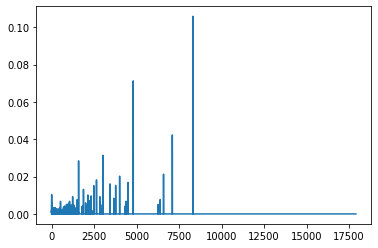

In [40]:
plt.plot(pogo.gap_vector_)

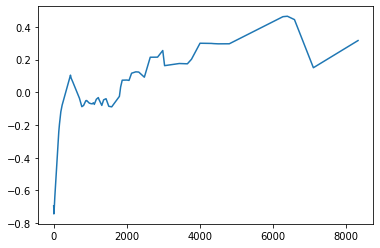

In [41]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


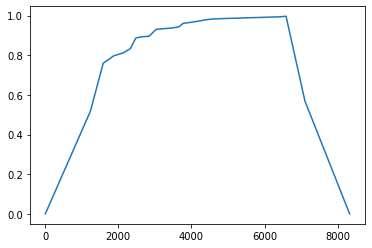

In [42]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [43]:
rand_indices[np.argmax(rand_array)]

6584

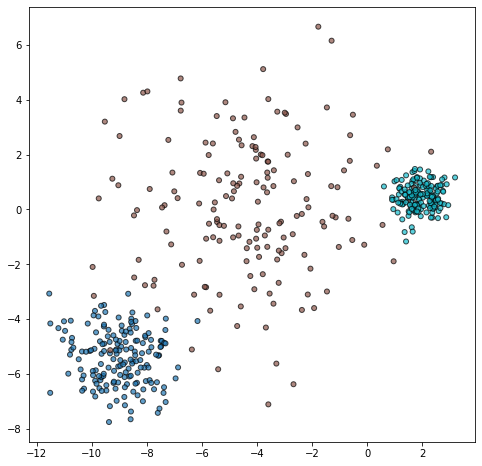

In [44]:
X=varied[0]
y=varied[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

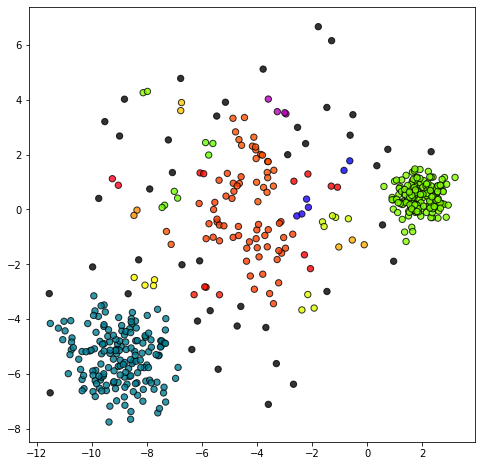

In [45]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [46]:
pogo.idx_

5369

In [47]:
pogo.candidates_[:10]

array([18297, 12260, 15860, 17325,     2,  5883,  4283,  8546,  3849,
       10186])

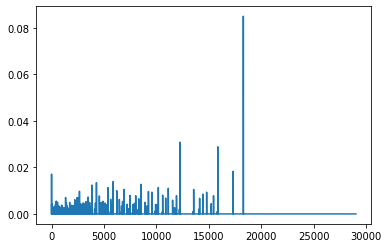

In [48]:
plt.plot(pogo.gap_vector_)

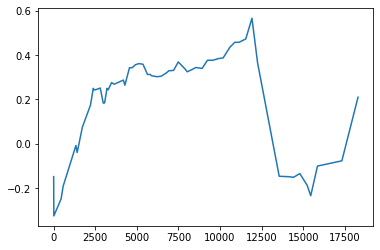

In [49]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


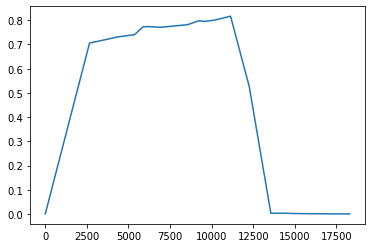

In [50]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [51]:
rand_indices[np.argmax(rand_array)]

11139

In [52]:
#DBSCAN Demo Data from scikitlearn
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
filename = 'dbscan-demo-data'

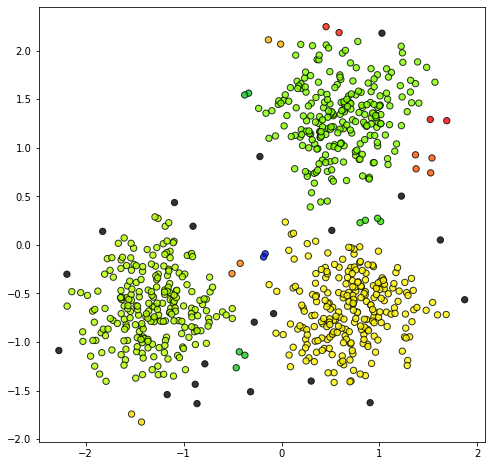

In [53]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [54]:
pogo.idx_

4817

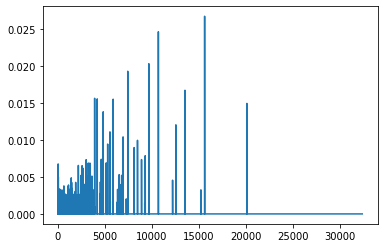

In [55]:
plt.plot(pogo.gap_vector_)

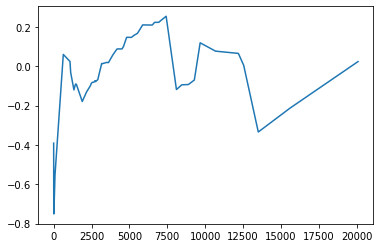

In [56]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


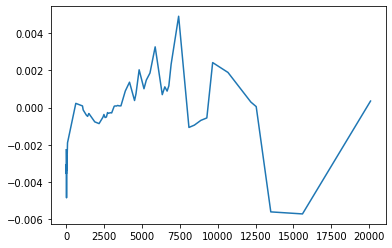

In [57]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [58]:
silhouette_indices[np.argmax(silhouette_gap)]

7424

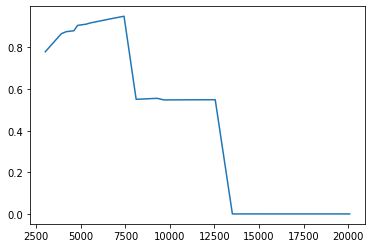

In [59]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [60]:
rand_indices[np.argmax(rand_array)]

7424

In [61]:

urls_with_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

urls_without_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/overlap.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/a1.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

ground_truth_urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.pa'
    
]

urls_with_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_with_ground_truth
}


urls_without_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_without_ground_truth
}


ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in ground_truth_urls
}

In [62]:
def return_dataset(filename):
    if filename in urls_with_ground_truth:
        url= urls_with_ground_truth[filename]
        print(url)
        parse = urlparse(url)
        print(filename)
        raw_data = urlopen(url)
        data = np.loadtxt(raw_data)

        print(data.shape)
        print(data[:10])

        y = data[:,2]
        print(y.shape)
        X = data[:,:2]
        print(X.shape)
        return X, y, filename


In [63]:
X, y, filename = return_dataset('R15.txt')

https://cs.joensuu.fi/sipu/datasets/R15.txt
R15.txt
(600, 3)
[[ 9.802 10.132  1.   ]
 [10.35   9.768  1.   ]
 [10.098  9.988  1.   ]
 [ 9.73   9.91   1.   ]
 [ 9.754 10.43   1.   ]
 [ 9.836  9.902  1.   ]
 [10.238  9.866  1.   ]
 [ 9.53   9.862  1.   ]
 [10.154  9.82   1.   ]
 [ 9.336 10.456  1.   ]]
(600,)
(600, 2)


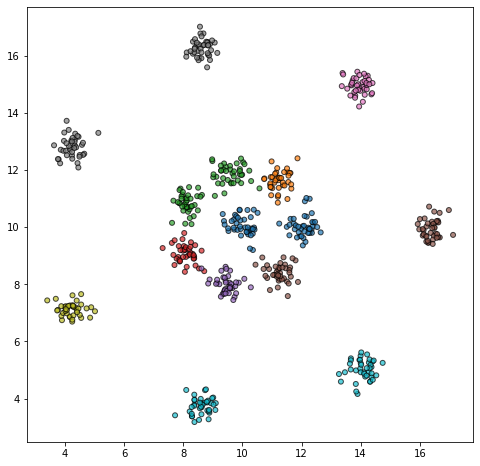

In [64]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

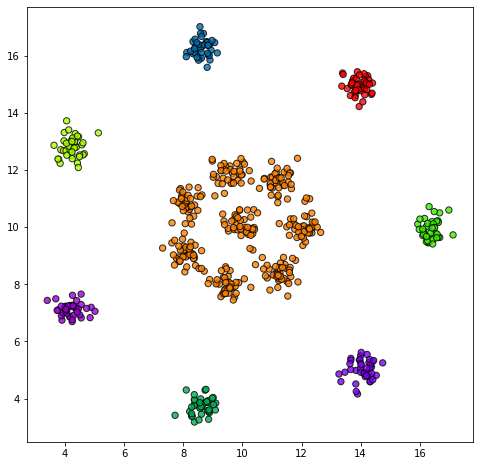

In [65]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [66]:
pogo.candidates_[:11]

array([7643, 6053, 3807, 4346, 7259, 5481, 6889, 3187, 5236, 4962, 5887])

In [67]:
pogo.idx_

7643

In [68]:
pogo.initial_idx_

7643

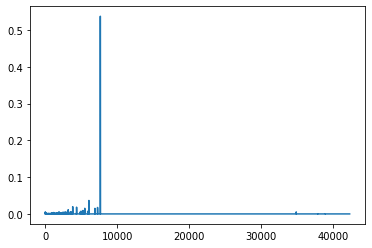

In [69]:
plt.plot(pogo.gap_vector_)

In [70]:
pogo.candidates_[2]

3807

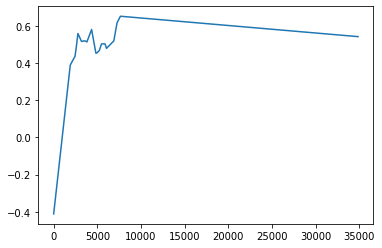

In [71]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(20)


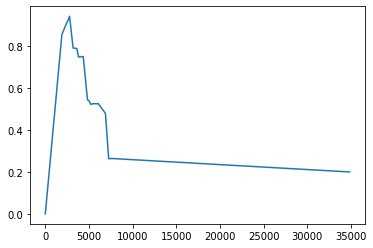

In [72]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [73]:
rand_indices[np.argmax(rand_array)]

2781

In [74]:
X, y, filename = return_dataset('D31.txt')

https://cs.joensuu.fi/sipu/datasets/D31.txt
D31.txt
(3100, 3)
[[25.0514  5.7475  1.    ]
 [26.6614  7.3414  1.    ]
 [25.2653  6.2466  1.    ]
 [25.2285  4.7447  1.    ]
 [25.7529  5.1564  1.    ]
 [24.0785  5.6693  1.    ]
 [25.2722  6.8676  1.    ]
 [24.6535  6.2443  1.    ]
 [26.9834  6.633   1.    ]
 [25.7437  6.3179  1.    ]]
(3100,)
(3100, 2)


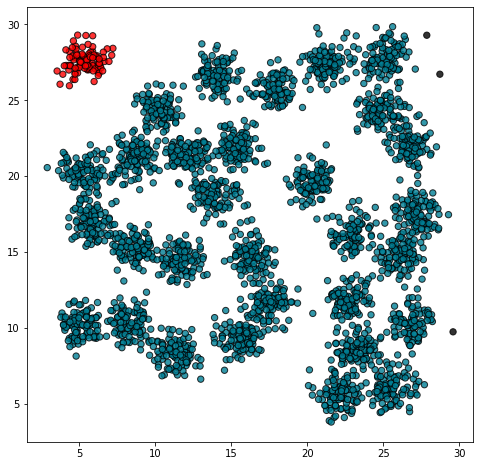

In [75]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()